**semantic scolar**

In [1]:
import requests
import pandas as pd
# Basic search parameters
url = "https://api.semanticscholar.org/graph/v1/paper/search"
params = {
    'query': 'transformer models',
    'fields': 'title,authors,year,citationCount,abstract',
    'limit': 5
}

# headers = {
#     'x-api-key': 'YOUR_API_KEY'  # if you have one (optional but recommended)
# }

response = requests.get(url, params=params)
data = response.json()

print(data)

{'total': 20394087, 'offset': 0, 'next': 5, 'data': [{'paperId': '13a0d8bb38f739990c8cd65a44061c6534f17221', 'title': 'OPT: Open Pre-trained Transformer Language Models', 'abstract': 'Large language models, which are often trained for hundreds of thousands of compute days, have shown remarkable capabilities for zero- and few-shot learning. Given their computational cost, these models are difficult to replicate without significant capital. For the few that are available through APIs, no access is granted to the full model weights, making them difficult to study. We present Open Pre-trained Transformers (OPT), a suite of decoder-only pre-trained transformers ranging from 125M to 175B parameters, which we aim to fully and responsibly share with interested researchers. We show that OPT-175B is comparable to GPT-3, while requiring only 1/7th the carbon footprint to develop. We are also releasing our logbook detailing the infrastructure challenges we faced, along with code for experimenting 

In [2]:
# Process the results into a DataFrame
if 'data' in data:
    formatted_data = []
    for paper in data['data']:
        formatted_paper = {
            'Title': paper.get('title'),
            'Authors': ', '.join([author['name'] for author in paper.get('authors', [])]),
            'Year': paper.get('year'),
            'Citations': paper.get('citationCount'),
            'Abstract': paper.get('abstract')[:300] + '...' if paper.get('abstract') else None
        }
        formatted_data.append(formatted_paper)
    
    df = pd.DataFrame(formatted_data)
    pd.set_option('display.max_colwidth', 60)  # Adjust column width
    print(df)
else:
    print("No results found or API error")

                                                         Title  \
0            OPT: Open Pre-trained Transformer Language Models   
1  GQA: Training Generalized Multi-Query Transformer Models...   
2      Integrating prior knowledge to build transformer models   
3  Transformer Models in Healthcare: A Survey and Thematic ...   
4  CogVideoX: Text-to-Video Diffusion Models with An Expert...   

                                                       Authors  Year  \
0  Susan Zhang, Stephen Roller, Naman Goyal, Mikel Artetxe,...  2022   
1  J. Ainslie, J. Lee-Thorp, Michiel de Jong, Yury Zemlyans...  2023   
2                   Pei Jiang, Takashi Obi, Yoshikazu Nakajima  2024   
3                      Kerstin Denecke, R. May, Octavio Rivera  2024   
4  Zhuoyi Yang, Jiayan Teng, Wendi Zheng, Ming Ding, Shiyu ...  2024   

   Citations                                                     Abstract  
0       3306  Large language models, which are often trained for hundr...  
1        496  Mult

In [ ]:
import requests
import time
import json

# API details
url = "https://www.searchapi.io/api/v1/search"
api_key = "Qeg1buThqizr68MqzRKFLpEN"
query = "Langchain"

all_results = []

# Loop through pages 1 to 50
for page in range(1, 51):
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 20,
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Error on page {page}: {response.status_code}")
        continue
    
    data = response.json()
    organic_results = data.get("organic_results", [])
    all_results.extend(organic_results)
    
    time.sleep(1)  # polite delay, can reduce or remove if needed

# Save all results as JSON
# with open("langchain_results.json", "w", encoding='utf-8') as f:
#     json.dump(all_results, f, ensure_ascii=False, indent=2)

# print(f"Saved {len(all_results)} results to langchain_results.json")


No results found or API error


In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

,Title,Source,RelativeDate,FormattedDate,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,2025-04-07 03:14,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,2025-04-04 15:14,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,2025-04-06 15:14,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,2025-04-06 18:14,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,2025-04-07 01:14,"MacKenzie Scott has ""transformed"" philanthropy since her..."


In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

,Title,Source,RelativeDate,FormattedDate,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,2025-04-07 03:14,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,2025-04-04 15:14,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,2025-04-06 15:14,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,2025-04-06 18:14,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,2025-04-07 01:14,"MacKenzie Scott has ""transformed"" philanthropy since her..."


**google patents**

In [40]:
import requests

params = {
    "engine": "google_patents",
    "q": "technology trend monitoring",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"  # Replace with your key
}

response = requests.get("https://www.searchapi.io/api/v1/search", params=params)
gpdata = response.json()
gpdata.keys()

dict_keys(['search_metadata', 'search_parameters', 'search_information', 'organic_results', 'summary', 'pagination'])

In [5]:
if 'organic_results' in gpdata and gpdata['organic_results'] : 
  print(gpdata['organic_results'][0].keys())

dict_keys(['position', 'rank', 'patent_id', 'title', 'snippet', 'priority_date', 'filing_date', 'grant_date', 'publication_date', 'inventor', 'assignee', 'publication_number', 'language', 'pdf', 'country_status'])


**google scolar**

In [ ]:
import requests
import time  # in case we want to be polite and add delays
import pandas as pd

# Setup
url = "https://www.searchapi.io/api/v1/search"
api_key = "BdVJ9kUYpdfAw6RYXy1t6KQm"

# Parameters
query = "Langchain"
results = []

# Loop through first 50 pages
for page in range(1, 21):  # Pages 1 to 50
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 20,         # max per page
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Failed on page {page}: {response.status_code}")
        continue

    data = response.json()
    
    # Extract and add the organic results
    organic_results = data.get("organic_results", [])
    results.extend(organic_results)
    
    # Optional: Be polite to the API (1-second delay)
    time.sleep(1)

# Convert to DataFrame
gsc_data = pd.DataFrame(results)

# Export to Excel
#df.to_excel("langchain_scholar_results.xlsx", index=False)

print(f"Scraped {len(results)} results across 50 pages.")


Scraped 500 results across 50 pages.


In [ ]:
import requests
import time  # in case we want to be polite and add delays
import pandas as pd

# Setup
url = "https://www.searchapi.io/api/v1/search"
api_key = "BdVJ9kUYpdfAw6RYXy1t6KQm"

# Parameters
query = "Langchain"
results = []

# Loop through first 50 pages
for page in range(1, 6):  # Pages 1 to 50
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 30,         # max per page
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Failed on page {page}: {response.status_code}")
        continue

    gsc_data = response.json()
    gsc_data.keys()
  

print(f"Scraped {len(gsc_data)} results across 5 pages.")


Scraped 0 results across 5 pages.


In [20]:
#gsc_data.to_excel('google_scolar_data.xlsx')

In [13]:
if 'organic_results' in gsc_data and gsc_data['organic_results'] : 
  print(gsc_data['organic_results'][0].keys())

dict_keys(['position', 'title', 'data_cid', 'link', 'publication', 'snippet', 'inline_links'])


In [14]:
# Let's inspect one search result
result = gsc_data["organic_results"][1]

for key in result:
    print(f"{key}: Type -> {type(result[key])}, Sample -> {result[key]}")


position: Type -> <class 'int'>, Sample -> 2
title: Type -> <class 'str'>, Sample -> Automated Generation and Evaluation of MultipleChoice Quizzes using Langchain and Gemini LLM
data_cid: Type -> <class 'str'>, Sample -> Qduivk7Vf4gJ
link: Type -> <class 'str'>, Sample -> https://ieeexplore.ieee.org/abstract/document/10739326/
publication: Type -> <class 'str'>, Sample -> P Pawar, R Dube, A Joshi, Z Gulhane… - … on Electrical Electronics …, 2024 - ieeexplore.ieee.org
snippet: Type -> <class 'str'>, Sample -> The research study investigates the use of cutting-edge technologies like Langchain and … uses Gemini AI to generate MCQs and Langchain for rapid engineering are covered in this …
inline_links: Type -> <class 'dict'>, Sample -> {'cited_by': {'cites_id': '9835814645382961985', 'total': 1, 'link': 'https://scholar.google.com/scholar?cites=9835814645382961985&as_sdt=40000005&sciodt=0,22&hl=en&num=20'}, 'related_articles_link': 'https://scholar.google.com/scholar?q=related:Qduivk7Vf4gJ

In [16]:
import pandas as pd

# Assuming data contains your JSON response
gsc_results = gsc_data.get("organic_results", [])
records = []

for item in gsc_results:
    # Extract authors names from each author dictionary.
    authors_list = item.get("authors", [])
    author_names = [author.get("name", "") for author in authors_list if isinstance(author, dict)]
    
    # Initialize citation_count
    citation_count = 0
    inline_links = item.get("inline_links", {})
    # Check if 'cited_by' exists and is a dict, then extract 'total'
    if isinstance(inline_links, dict) and 'cited_by' in inline_links:
        cited_by = inline_links.get("cited_by")
        if isinstance(cited_by, dict):
            citation_count = cited_by.get("total", 0)
    
    record = {
        "Title": item.get("title"),
        "Authors": ", ".join(author_names) if author_names else None,
        "Publication": item.get("publication"),
        "Snippet": item.get("snippet"),
        "Citation_Count": citation_count,
    }
    records.append(record)

gcs_df = pd.DataFrame(records)
gcs_df.head()




,Title,Authors,Publication,Snippet,Citation_Count
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8


In [17]:
# Split the 'publication' column into three parts
gcs_df[['authors', 'venue', 'year_source']] = gcs_df['Publication'].str.split(' - ', n=2, expand=True)


In [19]:
gcs_df.head()

,Title,Authors,Publication,Snippet,Citation_Count,authors,venue,year_source
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2,"A Ramprasad, P Sivakumar","2024 International Conference on …, 2024",ieeexplore.ieee.org
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1,"P Pawar, R Dube, A Joshi, Z Gulhane…","… on Electrical Electronics …, 2024",ieeexplore.ieee.org
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3,"A Saeed, N Dhanda, AS Rao…","2024 2nd International …, 2024",ieeexplore.ieee.org
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1,"S Rahayu, NS Harahap, S Agustian…","… : Indonesian Journal of …, 2024",journal.irpi.or.id
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8,C Yao,"arXiv preprint arXiv:2310.12430, 2023",arxiv.org


In [21]:
def split_venue_year(row):
    val = row['venue']
    
    # If it's only a 4-digit year
    if val and len(val.strip()) == 4:
        return pd.Series({'venue': None, 'year': val.strip()})
    
    # If it contains a comma, split on the last comma
    if isinstance(val, str) and ',' in val:
        parts = val.rsplit(',', 1)
        return pd.Series({'venue': parts[0].strip(), 'year': parts[1].strip()})
    
    # Otherwise, return the venue as-is and year as None
    return pd.Series({'venue': val, 'year': None})

# Apply only after the first split
gcs_df[['venue', 'year']] = gcs_df.apply(split_venue_year, axis=1)


In [27]:
gcs_df.head()

,Title,Authors,Publication,Snippet,Citation_Count,authors,venue,year_source,year
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2,"A Ramprasad, P Sivakumar",2024 International Conference on …,ieeexplore.ieee.org,2024
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1,"P Pawar, R Dube, A Joshi, Z Gulhane…",… on Electrical Electronics …,ieeexplore.ieee.org,2024
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3,"A Saeed, N Dhanda, AS Rao…",2024 2nd International …,ieeexplore.ieee.org,2024
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1,"S Rahayu, NS Harahap, S Agustian…",… : Indonesian Journal of …,journal.irpi.or.id,2024
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8,C Yao,arXiv preprint arXiv:2310.12430,arxiv.org,2023


In [28]:
gcs_df.to_excel('gcs_df.xlsx')

**IEEE Xplore**

In [29]:
import requests

API_KEY = "shrw4werbra7k85hqn6ghzr2"
response = requests.get(
    "http://ieeexploreapi.ieee.org/api/v1/search/articles",
    params={"querytext": "AI", "apikey": API_KEY}
)

print("Status Code:", response.status_code)  # Check if 200, 403, 429, etc.
print("Raw Response:", response.text)  # See what's actually returned

Status Code: 403
Raw Response: <h1>Developer Inactive</h1>


**google news**

In [6]:
import requests

url = "https://www.searchapi.io/api/v1/search"
params = {
  "engine": "google_news",
  "q": "Jeff Bezos news",
  "location": "New York,United States",
  "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

response = requests.get(url, params=params)
news_data = response.json()
news_data.keys()


dict_keys(['error'])

In [12]:
if 'organic_results' in news_data and news_data['organic_results'] : 
  print(news_data['organic_results'][0].keys())

dict_keys(['position', 'title', 'link', 'source', 'date', 'snippet', 'favicon', 'thumbnail'])


position: Type -> <class 'int'>, Sample -> 5
title: Type -> <class 'str'>, Sample -> MacKenzie Scott Has Given Away $19 Billion Since Divorce from Jeff Bezos 6 Years Ago
link: Type -> <class 'str'>, Sample -> https://people.com/since-jeff-bezos-divorce-mackenzie-scott-given-away-over-19-billion-11709699
source: Type -> <class 'str'>, Sample -> People.com
date: Type -> <class 'str'>, Sample -> 14 hours ago
snippet: Type -> <class 'str'>, Sample -> MacKenzie Scott has "transformed" philanthropy since her divorce from Jeff Bezos in 2019: In the past six years, she's donated $19 billion...
favicon: Type -> <class 'str'>, Sample -> 
thumbnail: Type -> <class 'str'>, Sample -> 

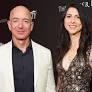

In [13]:
# Let's inspect one search result
news_result = news_data["organic_results"][4]

for key in news_result:
    print(f"{key}: Type -> {type(news_result[key])}, Sample -> {news_result[key]}")

In [14]:
import pandas as pd

# Suppose news_results is the list from your API response (i.e., response.json()['news_results'])
news_results = data.get("organic_results", [])

# Create a list of dictionaries with only the required keys
records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "Date": item.get("date"),
        "Snippet": item.get("snippet")
    }
    records.append(record)

# Create the DataFrame
df = pd.DataFrame(records)
df.head()


,Title,Source,Date,Snippet
0,Creating large language model applications utilizing lan...,None,None,… LangChain has been widely recognized in the AI communi...
1,Systematic literature review langchain proposed,None,None,While systematic literature reviews are frequently carri...
2,LangChain,None,None,… This paper provides an in-depth analysis of LangChain’...
3,Automating Customer Service using LangChain: Building cu...,None,None,"In the digital age, the dynamics of customer service are..."
4,LangChain v0. 3,None,None,… This paper provides an in-depth analysis of LangChain’...


In [15]:
import pandas as pd

# Use the correct key for news results
news_results = data.get("organic_results", [])

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "Date": item.get("date"),
        "Snippet": item.get("snippet")
    }
    records.append(record)

df = pd.DataFrame(records)
df.head()


,Title,Source,Date,Snippet
0,Creating large language model applications utilizing lan...,None,None,… LangChain has been widely recognized in the AI communi...
1,Systematic literature review langchain proposed,None,None,While systematic literature reviews are frequently carri...
2,LangChain,None,None,… This paper provides an in-depth analysis of LangChain’...
3,Automating Customer Service using LangChain: Building cu...,None,None,"In the digital age, the dynamics of customer service are..."
4,LangChain v0. 3,None,None,… This paper provides an in-depth analysis of LangChain’...


Available keys in news items:
dict_keys(['position', 'title', 'link', 'source', 'date', 'snippet', 'favicon', 'thumbnail'])

Sample item structure:
{'position': 1, 'title': "Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 billion after Donald Trump's ‘discounted’ reciprocal", 'link': 'https://timesofindia.indiatimes.com/technology/tech-news/elon-musk-jeff-bezos-and-mark-zuckerberg-lose-42-6-billion-as-trump-announces-discounted-reciprocal-tariffs/articleshow/120010512.cms', 'source': 'Times of India', 'date': '12 hours ago', 'snippet': 'TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk collectively lost $42.6 billion in a day due to new tariffs announced by President...', 'favicon': '', 'thumbnail': ''}

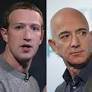

In [16]:
# Print the structure of the first news result
if news_data.get("organic_results"):
    first_item = news_data["organic_results"][0]
    print("Available keys in news items:")
    print(first_item.keys())
    
    print("\nSample item structure:")
    print(first_item)

In [22]:
import pandas as pd

news_results = news_data.get("organic_results", [])

records = []
for item in news_results:
    # Different APIs use different key names - adjust accordingly
    record = {
        "Title": item.get("title"),
        # Common variations for source
        "Source": item.get("source") or  # Nested source
                  item.get("publisher") or
                  item.get("site"),
        # Common variations for date
        "Date": item.get("date") or
                item.get("published_date") or
                item.get("pub_date"),
        "Snippet": item.get("snippet"),
        # Additional useful fields
        
    }
    records.append(record)

df = pd.DataFrame(records)
df.head()

,Title,Source,Date,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,"MacKenzie Scott has ""transformed"" philanthropy since her..."


In [21]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

,Title,Source,RelativeDate,FormattedDate,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,2025-04-07 03:14,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,2025-04-04 15:14,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,2025-04-06 15:14,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,2025-04-06 18:14,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,2025-04-07 01:14,"MacKenzie Scott has ""transformed"" philanthropy since her..."
